## Project HR:
To predict attrition of your valuable employee's.

In [170]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set_style('whitegrid')

In [171]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)
import sys
print(sys.version)

1.18.5
1.0.5
3.2.2
0.10.1
0.22.2.post1
3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [172]:
from google.colab import files
upload_files = files.upload()

Saving IBM_HR_Employee_Attrition.csv to IBM_HR_Employee_Attrition (1).csv


In [173]:
!ls

IBM_HR_Employee_Attrition.csv  sample_data


In [174]:
df = pd.read_csv('IBM_HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [175]:
df.shape

(1470, 35)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [177]:
df.isnull().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

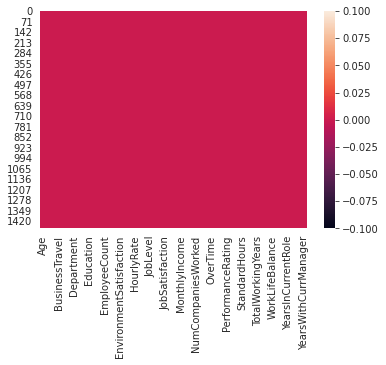

In [178]:
sns.heatmap(df.isnull())

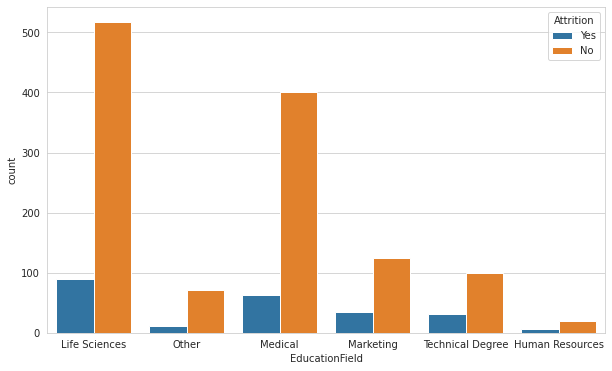

In [179]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'EducationField',hue = 'Attrition',data = df)

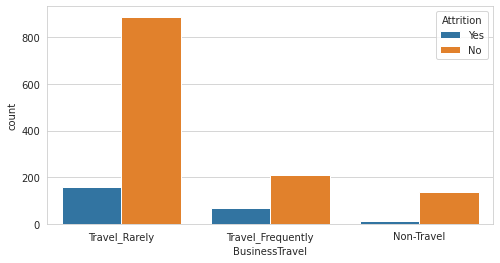

In [180]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'BusinessTravel',hue = 'Attrition',data = df)

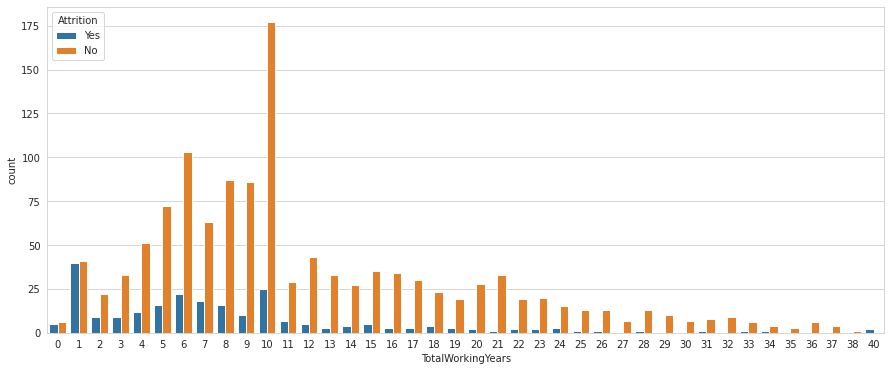

In [181]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'TotalWorkingYears',hue = 'Attrition',data = df)

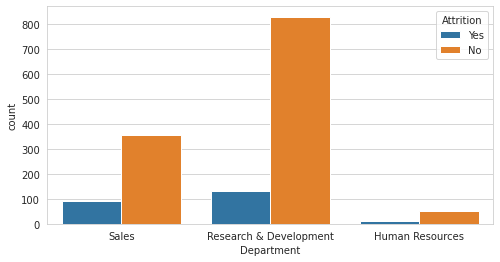

In [182]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Department',hue = 'Attrition',data = df)

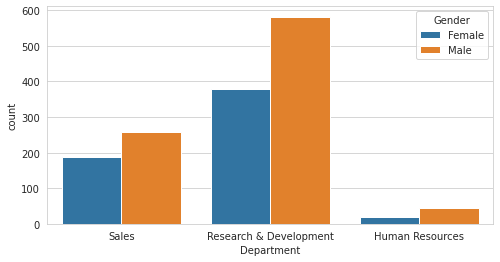

In [183]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Department',hue = 'Gender',data = df)

In [184]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


Little Analysis:

1. EmployeeCount = 1 (all rows)
2. EmployeeNumber --> sequentially increases.
3. StandardHours = 80 (all rows)
4. age of employees --> between 18 to 60.
5. Total working years of employees are from 0 to 40 years.
6. All Employess are over 18.


**we have to analyse each feature/column carefully and get the information.**

**here 4 features EmployeeCount,EmployeeNumber,StandardHours,Over18 is not giving much information about employee's details (not showing any variation in values). so we will not include these features in further model processing.**

In [185]:
# get all the unique values of column
c = ['Attrition','BusinessTravel','Department','EducationField','Gender','MaritalStatus','OverTime','JobRole']
for i in c:
    print(i,':',df[i].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [186]:
df['Attrition'] = df['Attrition'].map({'Yes':0,'No':1})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2})
df['Department'] = df['Department'].map({'Sales':0,'Research & Development':1,'Human Resources':2})
df['EducationField'] = df['EducationField'].map({'Life Sciences':0,'Other':1,'Medical':2,'Marketing':3,
                                                 'Technical Degree':4,'Human Resources':5})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Married':1,'Divorced':2})
df['OverTime'] = df['OverTime'].map({'Yes':0,'No':1})
df['JobRole'] = df['JobRole'].map({'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,
                                   'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,
                                   'Sales Representative':6,'Research Director':7,'Human Resources':8})

In [187]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,2,1,94,3,2,0,4,0,5993,19479,8,Y,0,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,3,0,61,2,2,1,2,1,5130,24907,1,Y,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,4,0,92,2,1,2,3,0,2090,2396,6,Y,0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,4,1,56,3,1,1,3,1,2909,23159,1,Y,0,11,3,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,1,0,40,3,1,2,2,1,3468,16632,9,Y,1,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2,1,2061,3,0,41,4,2,2,4,1,2571,12290,4,Y,1,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,1,0,613,1,6,1,2,1,2062,4,0,42,2,3,4,1,1,9991,21457,4,Y,1,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,1,0,155,1,4,3,0,1,2064,2,0,87,4,2,3,2,1,6142,5174,1,Y,0,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1,1,1023,0,2,3,2,1,2065,4,0,63,2,2,0,2,1,5390,13243,2,Y,1,14,3,4,80,0,17,3,2,9,6,0,8


In [188]:
df = df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis = 1)

In [189]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,2,1,94,3,2,0,4,0,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,3,0,61,2,2,1,2,1,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,0,92,2,1,2,3,0,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,4,1,56,3,1,1,3,1,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,0,40,3,1,2,2,1,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2


In [190]:
df.corr() # correlation coeff.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.16,-0.02,0.01,0.03,-0.00,0.21,-0.01,0.01,0.04,0.02,0.03,0.51,0.16,-0.00,0.10,0.50,0.03,0.30,-0.03,0.00,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
Attrition,0.16,1.00,0.00,0.06,0.06,-0.08,0.03,-0.08,0.10,0.03,0.01,0.13,0.17,0.03,0.10,0.16,0.16,-0.02,-0.04,0.25,0.01,-0.00,0.05,0.14,0.17,0.06,0.06,0.13,0.16,0.03,0.16
BusinessTravel,-0.02,0.00,1.00,0.00,-0.01,0.02,-0.00,-0.02,-0.00,-0.03,-0.03,-0.04,-0.02,-0.03,0.03,0.02,-0.03,0.01,-0.02,0.02,0.03,0.03,0.04,0.02,-0.03,-0.02,0.01,0.01,0.01,0.03,0.02
DailyRate,0.01,0.06,0.00,1.00,-0.01,-0.00,-0.02,-0.02,0.02,0.01,0.02,0.05,0.00,-0.00,0.03,0.07,0.01,-0.03,0.04,-0.01,0.02,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
Department,0.03,0.06,-0.01,-0.01,1.00,-0.02,-0.01,-0.06,0.02,-0.04,0.00,0.02,-0.10,0.43,-0.02,0.06,-0.05,-0.02,0.04,0.01,0.01,0.02,0.02,0.01,0.02,-0.04,-0.03,-0.02,-0.06,-0.04,-0.03
DistanceFromHome,-0.00,-0.08,0.02,-0.00,-0.02,1.00,0.02,0.02,-0.02,0.00,0.03,0.01,0.01,-0.04,-0.00,0.01,-0.02,0.03,-0.03,-0.03,0.04,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,0.03,-0.00,-0.02,-0.01,0.02,1.00,-0.00,-0.03,0.02,0.02,0.04,0.10,-0.02,-0.01,-0.00,0.09,-0.03,0.13,0.02,-0.01,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EducationField,-0.01,-0.08,-0.02,-0.02,-0.06,0.02,-0.00,1.00,0.02,0.00,-0.02,-0.01,0.01,0.04,-0.06,0.02,0.01,-0.01,0.01,-0.00,-0.04,-0.03,0.02,0.02,-0.00,0.01,0.03,0.00,-0.01,0.00,-0.00
EnvironmentSatisfaction,0.01,0.10,-0.00,0.02,0.02,-0.02,-0.03,0.02,1.00,-0.00,-0.05,-0.01,0.00,-0.01,-0.01,0.00,-0.01,0.04,0.01,-0.07,-0.03,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
Gender,0.04,0.03,-0.03,0.01,-0.04,0.00,0.02,0.00,-0.00,1.00,0.00,-0.02,0.04,0.01,-0.03,-0.05,0.03,0.04,0.04,-0.04,-0.00,0.01,-0.02,-0.01,0.05,0.04,0.00,0.03,0.04,0.03,0.03


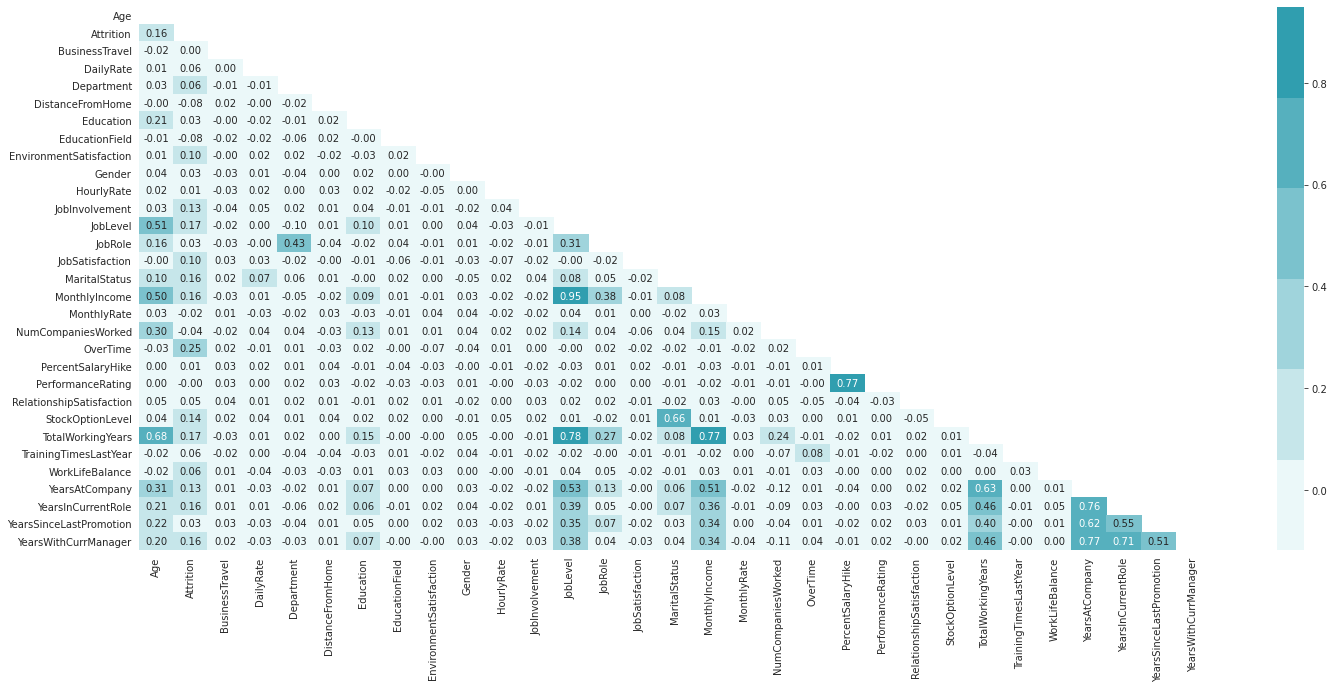

In [191]:
plt.figure(figsize = (24,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True # will remove upper half
cmap = sns.light_palette((210,90,60),input = 'husl')
# getting masked lower triangular of corr matrix
sns.heatmap(df.corr(),mask = mask,cmap = cmap,annot = True,fmt = '.2f')

**Analysis from Correlation coeff.:**
here we are taking 0.7 as threshold (higher than 0.7 is closely correlated).
1. MonthlyIncome and JobLevel (0.95)
2. TotalWorkingYears and JobLevel (0.78)
3. TotalWorkingYears and MonthlyIncome (0.77)
4. PerformanceRating and PercentSaleryHike (0.77)
5. YearsWithCurrManager and YearsAtCompany (0.77)
6. YearsInCurrentRole and YearsAtCompany (0.76)
7. YearsWithCurrManager and YearsInCurrentRole (0.71)

In [192]:
y = df['Attrition']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition, dtype: int64

In [193]:
x = df.drop(['Attrition'],axis = 1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,0,1,2,0,2,1,94,3,2,0,4,0,5993,19479,8,0,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,0,3,0,61,2,2,1,2,1,5130,24907,1,1,23,4,4,1,10,3,3,10,7,1,7
2,37,0,1373,1,2,2,1,4,0,92,2,1,2,3,0,2090,2396,6,0,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,0,4,1,56,3,1,1,3,1,2909,23159,1,0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,2,1,0,40,3,1,2,2,1,3468,16632,9,1,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,2,3,0,41,4,2,2,4,1,2571,12290,4,1,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,2,4,0,42,2,3,4,1,1,9991,21457,4,1,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,0,2,0,87,4,2,3,2,1,6142,5174,1,0,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,0,2,3,2,4,0,63,2,2,0,2,1,5390,13243,2,1,14,3,4,0,17,3,2,9,6,0,8


In [194]:
x.astype('float64')

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.00,0.00,"1,102.00",0.00,1.00,2.00,0.00,2.00,1.00,94.00,3.00,2.00,0.00,4.00,0.00,"5,993.00","19,479.00",8.00,0.00,11.00,3.00,1.00,0.00,8.00,0.00,1.00,6.00,4.00,0.00,5.00
1,49.00,1.00,279.00,1.00,8.00,1.00,0.00,3.00,0.00,61.00,2.00,2.00,1.00,2.00,1.00,"5,130.00","24,907.00",1.00,1.00,23.00,4.00,4.00,1.00,10.00,3.00,3.00,10.00,7.00,1.00,7.00
2,37.00,0.00,"1,373.00",1.00,2.00,2.00,1.00,4.00,0.00,92.00,2.00,1.00,2.00,3.00,0.00,"2,090.00","2,396.00",6.00,0.00,15.00,3.00,2.00,0.00,7.00,3.00,3.00,0.00,0.00,0.00,0.00
3,33.00,1.00,"1,392.00",1.00,3.00,4.00,0.00,4.00,1.00,56.00,3.00,1.00,1.00,3.00,1.00,"2,909.00","23,159.00",1.00,0.00,11.00,3.00,3.00,0.00,8.00,3.00,3.00,8.00,7.00,3.00,0.00
4,27.00,0.00,591.00,1.00,2.00,1.00,2.00,1.00,0.00,40.00,3.00,1.00,2.00,2.00,1.00,"3,468.00","16,632.00",9.00,1.00,12.00,3.00,4.00,1.00,6.00,3.00,3.00,2.00,2.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.00,1.00,884.00,1.00,23.00,2.00,2.00,3.00,0.00,41.00,4.00,2.00,2.00,4.00,1.00,"2,571.00","12,290.00",4.00,1.00,17.00,3.00,3.00,1.00,17.00,3.00,3.00,5.00,2.00,0.00,3.00
1466,39.00,0.00,613.00,1.00,6.00,1.00,2.00,4.00,0.00,42.00,2.00,3.00,4.00,1.00,1.00,"9,991.00","21,457.00",4.00,1.00,15.00,3.00,1.00,1.00,9.00,5.00,3.00,7.00,7.00,1.00,7.00
1467,27.00,0.00,155.00,1.00,4.00,3.00,0.00,2.00,0.00,87.00,4.00,2.00,3.00,2.00,1.00,"6,142.00","5,174.00",1.00,0.00,20.00,4.00,2.00,1.00,6.00,0.00,3.00,6.00,2.00,0.00,3.00
1468,49.00,1.00,"1,023.00",0.00,2.00,3.00,2.00,4.00,0.00,63.00,2.00,2.00,0.00,2.00,1.00,"5,390.00","13,243.00",2.00,1.00,14.00,3.00,4.00,0.00,17.00,3.00,2.00,9.00,6.00,0.00,8.00


### **Model Training using DecisionTreeClassifier:**

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [197]:
type(x_train)

pandas.core.frame.DataFrame

In [198]:

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [199]:
#type(x_train) # numpy.ndarray

In [200]:
def print_score(model,x_train,y_train,x_test,y_test,part):
  if part == 'train':
    y_pred = model.predict(x_train)
    print("Training Performance:\n\n")
    print("Accuracy:{0:.4f}\n".format(accuracy_score(y_train,y_pred)))
    print("Clasification Report:\n{}\n".format(classification_report(y_train,y_pred)))
    print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train,y_pred)))
    print("ROC_AUC_Score:{0:.4f}\n".format(roc_auc_score(y_train,y_pred)))
   
  elif part == 'test':
    y_pred = model.predict(x_test)
    print("Testing Performance:\n\n")
    print("Accuracy:{0:.4f}\n".format(accuracy_score(y_test,y_pred)))
    print("Clasification Report:\n{}\n".format(classification_report(y_test,y_pred)))
    print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test,y_pred)))
    print("ROC_AUC_Score:{0:.4f}\n".format(roc_auc_score(y_test,y_pred)))
    

In [201]:
clf = tree.DecisionTreeClassifier(random_state= 42)

In [202]:
clf.fit(x_train,y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [203]:
print_score(clf,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clf,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:1.0000

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix:
[[198   0]
 [  0 978]]

ROC_AUC_Score:1.0000


***************************************************************

Testing Performance:


Accuracy:0.7687

Clasification Report:
              precision    recall  f1-score   support

           0       0.19      0.23      0.21        39
           1       0.88      0.85      0.86       255

    accuracy                           0.77       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.77      0.78       294


Confusion Matrix:
[[  9  30]
 [ 38 217]]

ROC_AUC_Score:0.5409



### **Model Fitting using Bagging:**

In [204]:
from sklearn.ensemble import BaggingClassifier

In [205]:
clfbag = BaggingClassifier(base_estimator=clf,n_estimators=100,bootstrap=True,n_jobs=-1,random_state=42)

In [206]:
clfbag.fit(x_train,y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [207]:
print_score(clfbag,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clfbag,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:1.0000

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix:
[[198   0]
 [  0 978]]

ROC_AUC_Score:1.0000


***************************************************************

Testing Performance:


Accuracy:0.8605

Clasification Report:
              precision    recall  f1-score   support

           0       0.43      0.15      0.23        39
           1       0.88      0.97      0.92       255

    accuracy                           0.86       294
   macro avg       0.66      0.56      0.57       294
weighted avg       0.82      0.86      0.83       294


Confusion Matrix:
[[  6  33]
 [  8 247]]

ROC_AUC_Score:0.5612



### **Model Fitting using Random Forest:**

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
clfRF = RandomForestClassifier(n_estimators=100)

In [210]:
clfRF.fit(x_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
print_score(clfRF,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clfRF,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:1.0000

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix:
[[198   0]
 [  0 978]]

ROC_AUC_Score:1.0000


***************************************************************

Testing Performance:


Accuracy:0.8844

Clasification Report:
              precision    recall  f1-score   support

           0       0.86      0.15      0.26        39
           1       0.89      1.00      0.94       255

    accuracy                           0.88       294
   macro avg       0.87      0.57      0.60       294
weighted avg       0.88      0.88      0.85       294


Confusion Matrix:
[[  6  33]
 [  1 254]]

ROC_AUC_Score:0.5750



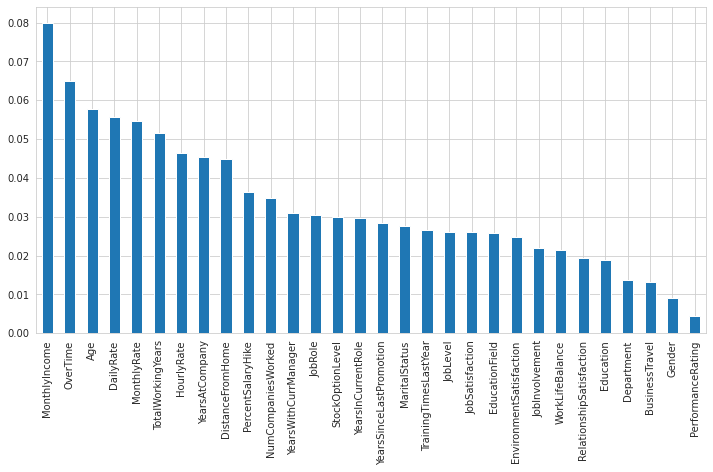

In [212]:
pd.Series(clfRF.feature_importances_,index= x_train.columns).sort_values(ascending = False).plot(kind = 'bar',figsize=(12,6))

### **Model Fitting using AdaBoost:**

In [213]:
from sklearn.ensemble import AdaBoostClassifier

In [214]:
clfada = AdaBoostClassifier()

In [215]:
clfada.fit(x_train,y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [216]:
print_score(clfada,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clfada,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.9082

Clasification Report:
              precision    recall  f1-score   support

           0       0.87      0.54      0.66       198
           1       0.91      0.98      0.95       978

    accuracy                           0.91      1176
   macro avg       0.89      0.76      0.80      1176
weighted avg       0.91      0.91      0.90      1176


Confusion Matrix:
[[106  92]
 [ 16 962]]

ROC_AUC_Score:0.7595


***************************************************************

Testing Performance:


Accuracy:0.8571

Clasification Report:
              precision    recall  f1-score   support

           0       0.43      0.26      0.32        39
           1       0.89      0.95      0.92       255

    accuracy                           0.86       294
   macro avg       0.66      0.60      0.62       294
weighted avg       0.83      0.86      0.84       294


Confusion Matrix:
[[ 10  29]
 [ 13 242]]

ROC_AUC_Score:0.6027



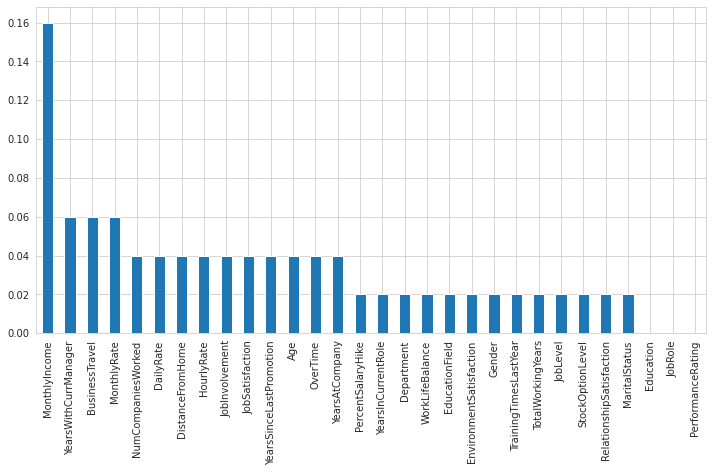

In [217]:
pd.Series(clfada.feature_importances_,index= x_train.columns).sort_values(ascending = False).plot(kind = 'bar',figsize=(12,6))

### **Model Fitting using AdaBoost with Random Forest:**

In [218]:
adaRF = AdaBoostClassifier(RandomForestClassifier(n_estimators=100),n_estimators=100)

In [219]:
adaRF.fit(x_train,y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [220]:
print_score(adaRF,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(adaRF,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:1.0000

Clasification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       978

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix:
[[198   0]
 [  0 978]]

ROC_AUC_Score:1.0000


***************************************************************

Testing Performance:


Accuracy:0.8776

Clasification Report:
              precision    recall  f1-score   support

           0       0.80      0.10      0.18        39
           1       0.88      1.00      0.93       255

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294


Confusion Matrix:
[[  4  35]
 [  1 254]]

ROC_AUC_Score:0.5493



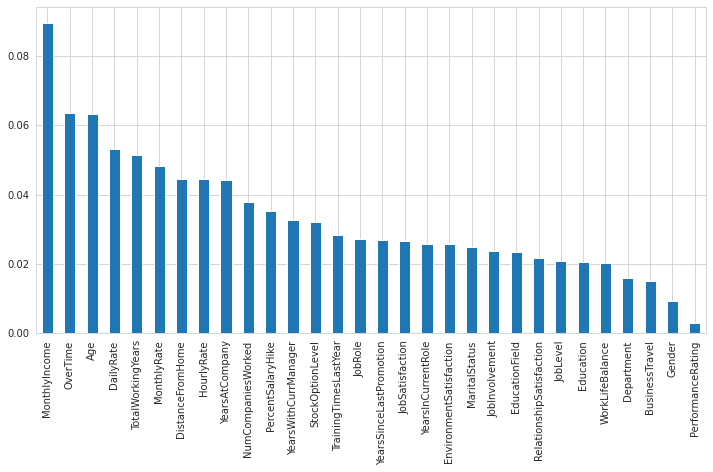

In [221]:
pd.Series(adaRF.feature_importances_,index= x_train.columns).sort_values(ascending = False).plot(kind = 'bar',figsize=(12,6))

### **Model Fitting using Gradient Boosting Classifier:**

In [222]:
from sklearn.ensemble import GradientBoostingClassifier

In [223]:
clfgb = GradientBoostingClassifier(n_estimators=100)

In [224]:
clfgb.fit(x_train,y_train.ravel())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [225]:
print_score(clfgb,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(clfgb,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.9583

Clasification Report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       198
           1       0.95      1.00      0.98       978

    accuracy                           0.96      1176
   macro avg       0.97      0.88      0.92      1176
weighted avg       0.96      0.96      0.96      1176


Confusion Matrix:
[[150  48]
 [  1 977]]

ROC_AUC_Score:0.8783


***************************************************************

Testing Performance:


Accuracy:0.8844

Clasification Report:
              precision    recall  f1-score   support

           0       0.63      0.31      0.41        39
           1       0.90      0.97      0.94       255

    accuracy                           0.88       294
   macro avg       0.77      0.64      0.67       294
weighted avg       0.87      0.88      0.87       294


Confusion Matrix:
[[ 12  27]
 [  7 248]]

ROC_AUC_Score:0.6401



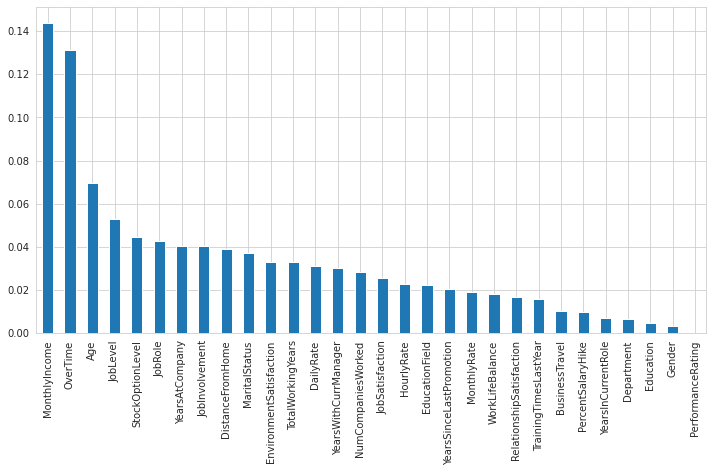

In [226]:
pd.Series(clfgb.feature_importances_,index= x_train.columns).sort_values(ascending = False).plot(kind = 'bar',figsize=(12,6))

### **Model Fitting using XG Boost Classifier:**

In [227]:
import xgboost

In [228]:
xg = xgboost.XGBClassifier(n_estimators=100)

In [229]:
xg.fit(x_train,y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [230]:
print_score(xg,x_train,y_train,x_test,y_test,part = 'train')
print("\n***************************************************************\n")
print_score(xg,x_train,y_train,x_test,y_test,part = 'test')

Training Performance:


Accuracy:0.9405

Clasification Report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79       198
           1       0.93      1.00      0.97       978

    accuracy                           0.94      1176
   macro avg       0.96      0.83      0.88      1176
weighted avg       0.94      0.94      0.94      1176


Confusion Matrix:
[[130  68]
 [  2 976]]

ROC_AUC_Score:0.8273


***************************************************************

Testing Performance:


Accuracy:0.8912

Clasification Report:
              precision    recall  f1-score   support

           0       0.73      0.28      0.41        39
           1       0.90      0.98      0.94       255

    accuracy                           0.89       294
   macro avg       0.82      0.63      0.67       294
weighted avg       0.88      0.89      0.87       294


Confusion Matrix:
[[ 11  28]
 [  4 251]]

ROC_AUC_Score:0.6332



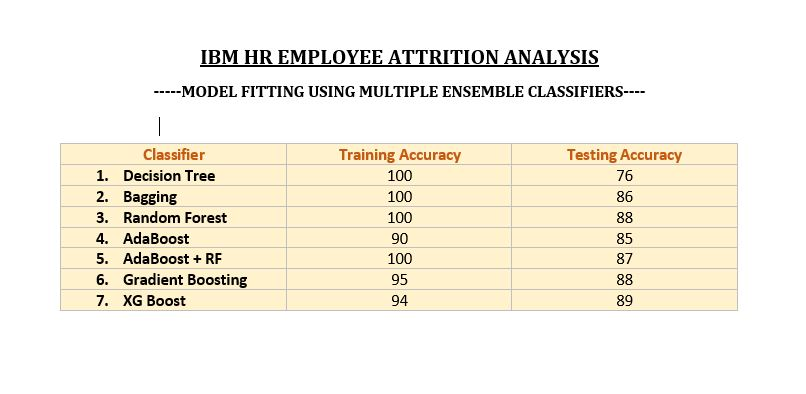

#### Note:Accuracy in %.